In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('worldometer_coronavirus_daily_data.csv', parse_dates=['date'])

In [4]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81054 entries, 0 to 81053
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     81054 non-null  datetime64[ns]
 1   country                  81054 non-null  object        
 2   cumulative_total_cases   81054 non-null  float64       
 3   daily_new_cases          74585 non-null  float64       
 4   active_cases             80314 non-null  float64       
 5   cumulative_total_deaths  74394 non-null  float64       
 6   daily_new_deaths         63005 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 4.3+ MB


In [5]:
ind = df[df['country']=='India']
print(ind)

            date country  cumulative_total_cases  daily_new_cases  \
34434 2020-02-15   India                     3.0              NaN   
34435 2020-02-16   India                     3.0              0.0   
34436 2020-02-17   India                     3.0              0.0   
34437 2020-02-18   India                     3.0              0.0   
34438 2020-02-19   India                     3.0              0.0   
...          ...     ...                     ...              ...   
34799 2021-02-14   India              10916172.0          11434.0   
34800 2021-02-15   India              10925311.0           9139.0   
34801 2021-02-16   India              10937106.0          11795.0   
34802 2021-02-17   India              10949546.0          12440.0   
34803 2021-02-18   India              10962189.0          12643.0   

       active_cases  cumulative_total_deaths  daily_new_deaths  
34434           0.0                      0.0               NaN  
34435           0.0                      

In [11]:
ind.isnull()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
34434,False,False,False,True,False,False,True
34435,False,False,False,False,False,False,True
34436,False,False,False,False,False,False,True
34437,False,False,False,False,False,False,True
34438,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
34799,False,False,False,False,False,False,False
34800,False,False,False,False,False,False,False
34801,False,False,False,False,False,False,False
34802,False,False,False,False,False,False,False


In [6]:
ind.fillna(value=0.0,inplace=True)

C:\Users\dell\miniconda3\envs\dsenv\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


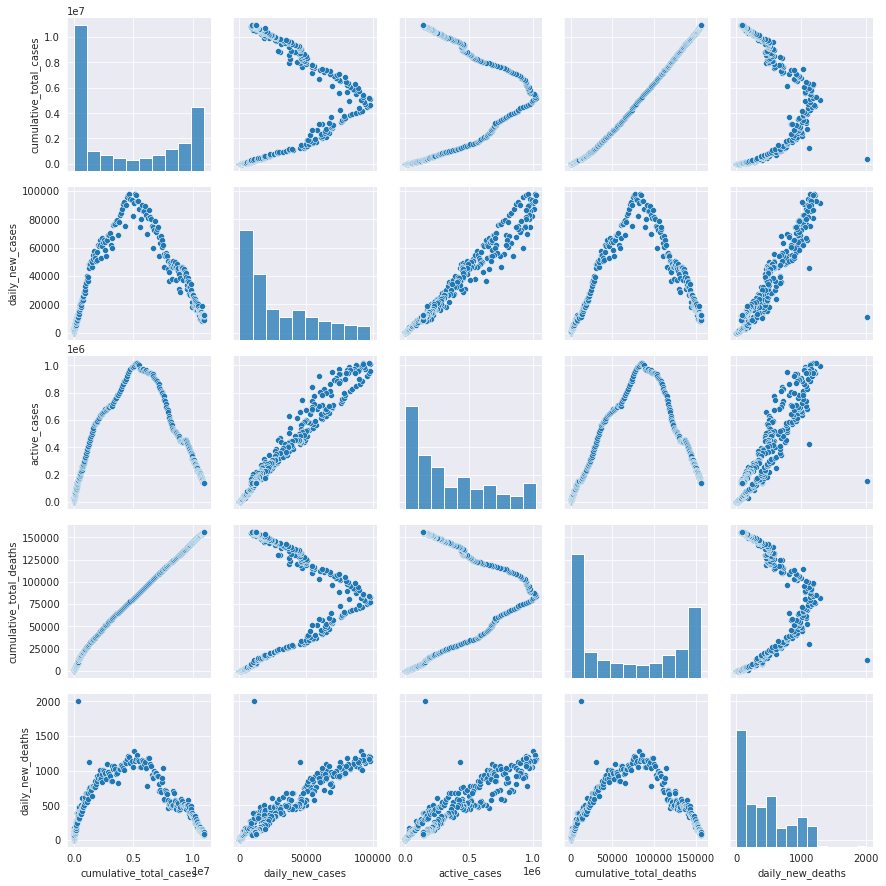

In [20]:
sns.set_style('darkgrid')
sns.pairplot(ind)

<AxesSubplot:xlabel='date', ylabel='daily_new_deaths'>

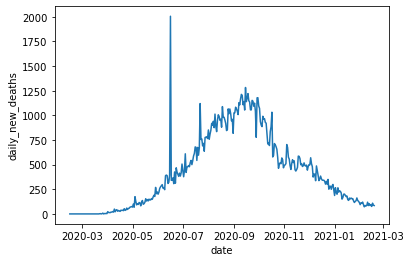

In [16]:
sns.lineplot(x='date', y='daily_new_deaths', data=ind)

In [7]:
us = df[df['country']=='USA']
us = us.fillna(value='0',inplace=True)
print(us)

None
C:\Users\dell\miniconda3\envs\dsenv\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


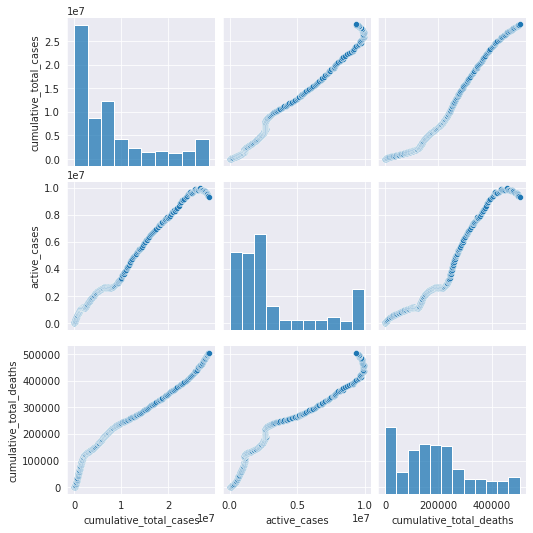

In [35]:
sns.pairplot(us)

<AxesSubplot:xlabel='cumulative_total_deaths', ylabel='Density'>

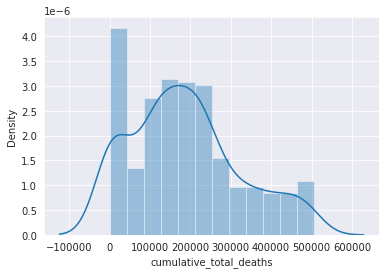

In [39]:
sns.distplot(us['cumulative_total_deaths'])

<AxesSubplot:xlabel='cumulative_total_deaths', ylabel='Density'>

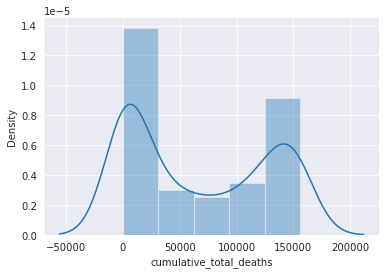

In [40]:
sns.distplot(ind['cumulative_total_deaths'])

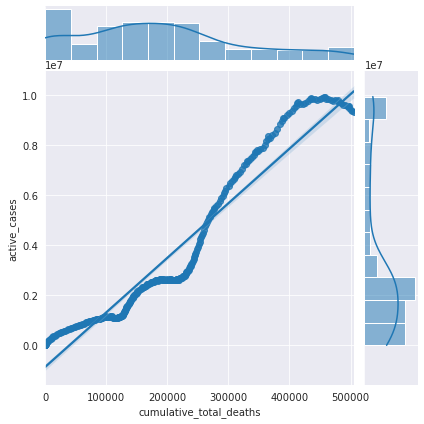

In [44]:
sns.jointplot(x='cumulative_total_deaths', y='active_cases', data=us, kind='reg')

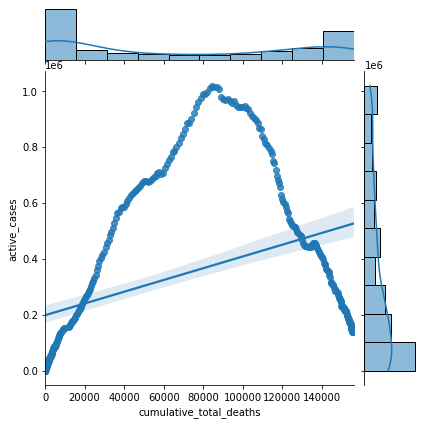

In [9]:
sns.jointplot(x='cumulative_total_deaths', y='active_cases', data=ind, kind='reg')

In [17]:
ind.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
34434,2020-02-15,India,3.0,0.0,0.0,0.0,0.0
34435,2020-02-16,India,3.0,0.0,0.0,0.0,0.0
34436,2020-02-17,India,3.0,0.0,0.0,0.0,0.0
34437,2020-02-18,India,3.0,0.0,0.0,0.0,0.0
34438,2020-02-19,India,3.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='cumulative_total_deaths'>

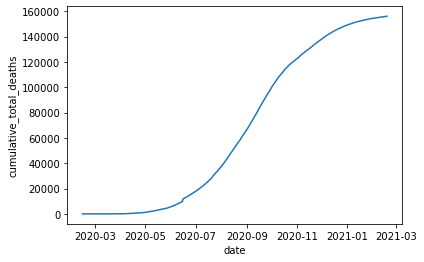

In [8]:
sns.lineplot(x='date', y='cumulative_total_deaths', data=ind)

In [12]:
dates = ind['date']
y = ind['cumulative_total_deaths']

In [14]:
X = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [37]:
X = X.reshape(-1,1)

In [15]:
y = np.array(y)
y = y.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [20]:
preds = linreg.predict(X_test)

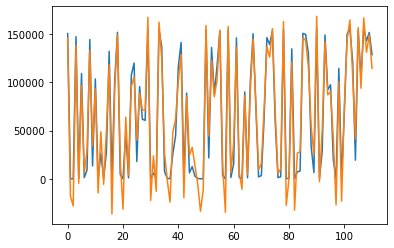

In [21]:
plt.plot(y_test)
plt.plot(preds)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
print("MAE: ",mean_absolute_error(y_test,preds))
print("MSE: ",mean_squared_error(y_test,preds))

MAE:  12963.031295654144
MSE:  234431076.1301589


In [24]:
pred_all = linreg.predict(X)

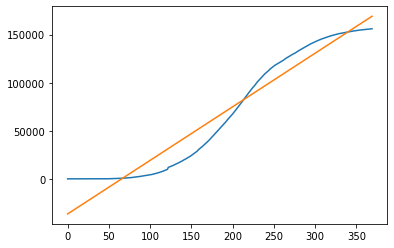

In [26]:
plt.plot(y)
plt.plot(pred_all)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

In [46]:
Xp_train, Xp_test, y_train, y_test = train_test_split(X_poly,y,test_size=0.3,random_state=42)

In [47]:
polreg = LinearRegression()
polreg.fit(Xp_train,y_train)

LinearRegression()

In [48]:
poly_preds = polreg.predict(Xp_test)

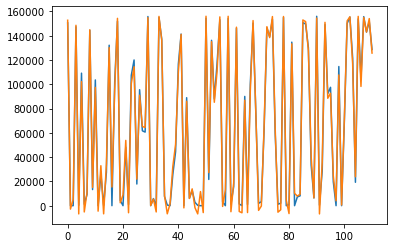

In [49]:
plt.plot(y_test)
plt.plot(poly_preds)

In [50]:
print("MAE: ",mean_absolute_error(y_test,poly_preds))
print("MSE: ",mean_squared_error(y_test,poly_preds))

MAE:  3957.8700658040634
MSE:  23986656.712415807


In [51]:
poly_preds_all = polreg.predict(X_poly)

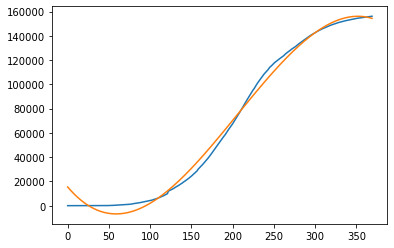

In [52]:
plt.plot(y)
plt.plot(poly_preds_all)